### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [2]:
# ! pip  install nibabel
!python 1_build_adj_matrix.py ../data/simplePhantoms/fanning_2d_5bundles/wm_vf.nii.gz ../data/simplePhantoms/fanning_2d_5bundles/fods.nii.gz --threshold 0.02 graph

Figure(640x480)


### Afficher le graphe: 

Figure(640x480)


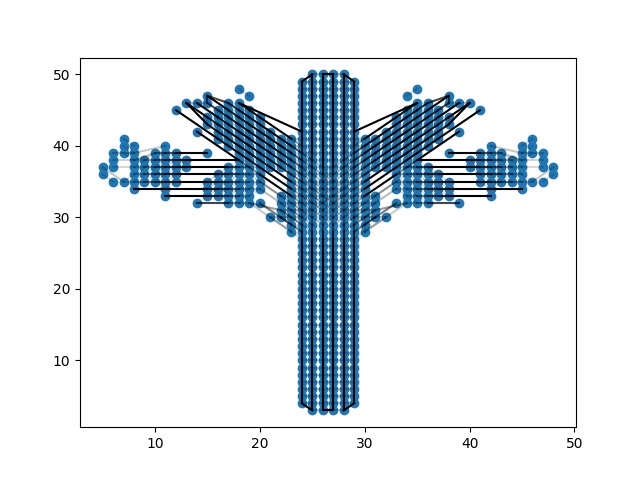

In [3]:
import sys

sys.path.append(r"C:\Users\harsh\quactography")

from IPython.display import Image, display  # type: ignore
!python 2_draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))




### Créer une matrice d'adjacence aléatoire:

In [ ]:
!python 1_build_random_adj_matrix.py 3 3  False rand_graph

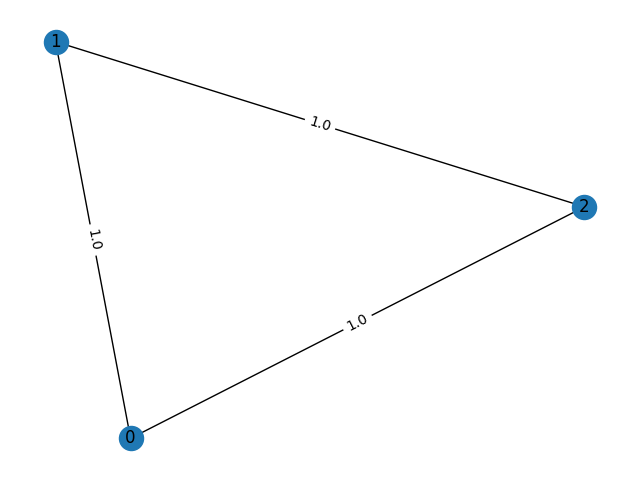

In [6]:
!python 2_draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

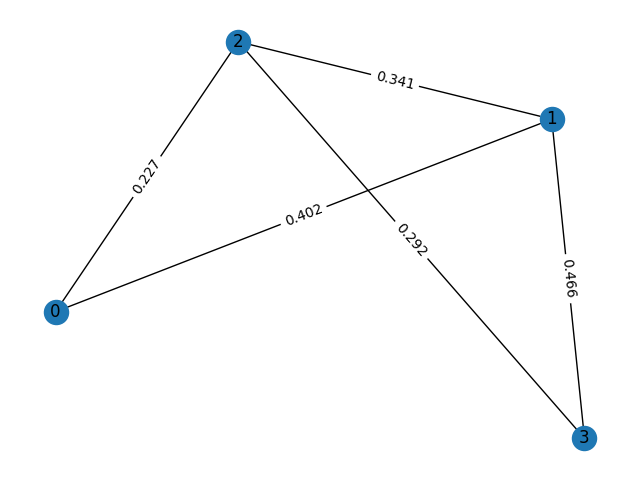

In [19]:
!python 2_draw_random_adj_matrix.py toy_graphs/weighted_5_edges_rand_graph weighted_17_rand_graph_visu
display(Image(filename='weighted_17_rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [2]:
!python find_max_intensity_diffusion_path.py C:/Users/harsh/quactography/data/test_graphs/weighted_5_edges_rand_graph 0 3 qaoa_solver_infos --alphas  1.5   --reps 1  -npr 1 --optimizer Differential --plt_cost_landscape Yes

Traceback (most recent call last):
  File "c:\Users\harsh\quactography\scripts\find_max_intensity_diffusion_path.py", line 3, in <module>
    from quactography.graph.undirected_graph import Graph
ModuleNotFoundError: No module named 'quactography'


In [9]:
import sys
import numpy as np 

sys.path.append(r"C:\Users\harsh\quactography")

file_opt_res = np.load("params_iterations.npz", allow_pickle=True)


### Visualiser les chemins qui maximise la valeur absolue des poids:

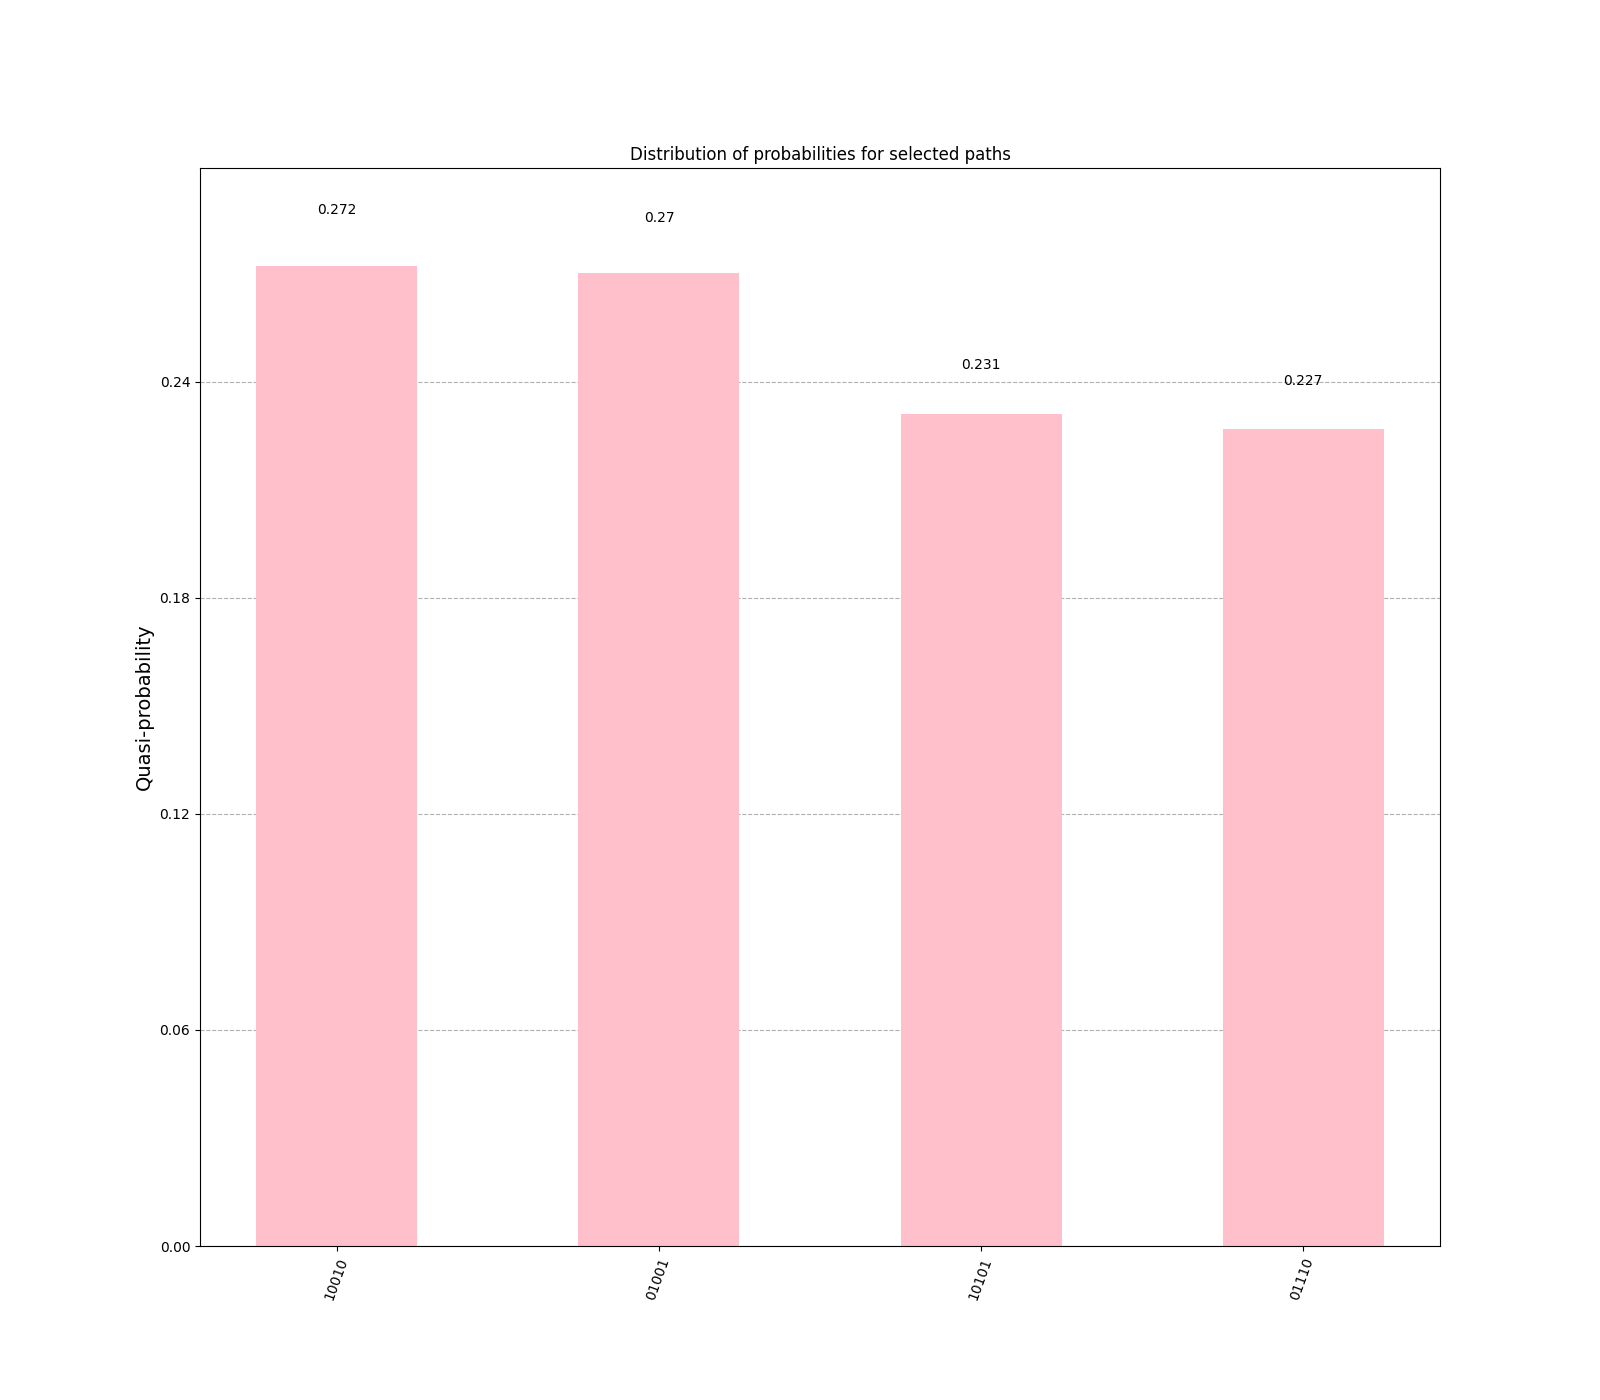

In [22]:
from IPython.display import Image, display  # type: ignore
!python 4_plot_distribution_probabilities.py qaoa_solver_infos_alpha_0.5186155057328249.npz  visu_total_dist visu_selected_dist 
display(Image(filename='visu_selected_dist_0.png'))
# display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

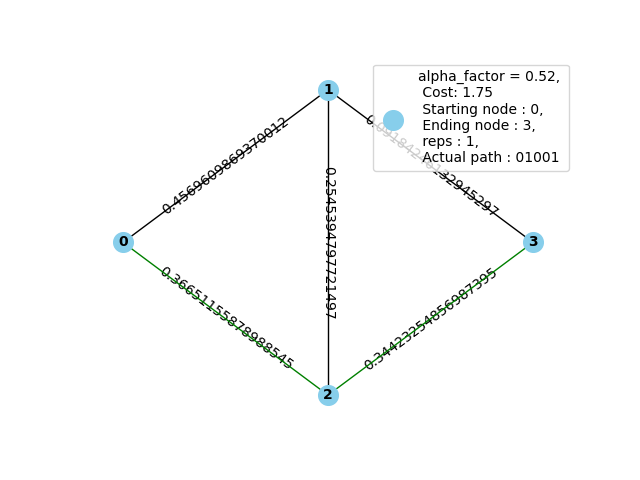

In [23]:
!python 5_plot_optimal_paths.py toy_graphs/weighted_5_edges_rand_graph  qaoa_solver_infos_alpha_0.5186155057328249.npz opt_paths

display(Image(filename='opt_paths_0_alpha_0.52.png'))


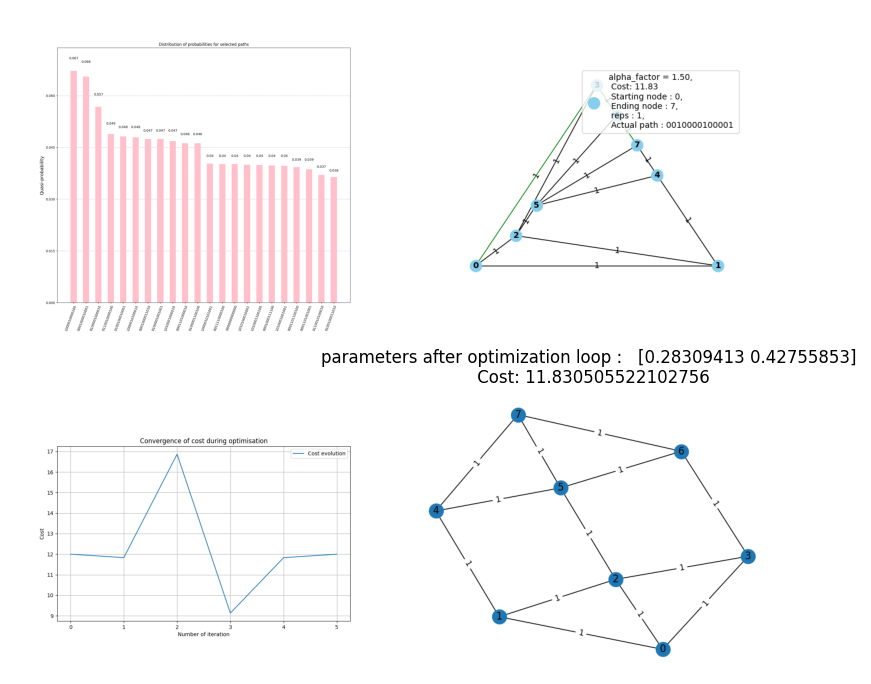

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Chargement des quatre images
image1 = mpimg.imread("visu_selected_dist_0.png")
image2 = mpimg.imread("opt_paths_0_alpha_1.50.png")
image3 = mpimg.imread("cost_history_plot.png")
image4 = mpimg.imread("13_rand_graph_visu.png")

# Création de la figure et des sous-graphiques 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Ajout des images dans la grille
axs[0, 0].imshow(image1)
axs[0, 0].axis("off")  # Masquer les axes

axs[0, 1].imshow(image2)
axs[0, 1].axis("off")

axs[1, 0].imshow(image3)
axs[1, 0].axis("off")

axs[1, 1].imshow(image4)
axs[1, 1].axis("off")

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
# plt.title(f'parameters after optimization loop : ')
# Sauvegarde de l'image combinée
# plt.savefig("res_for_5.png", bbox_inches="tight", pad_inches=0.1)
plt.savefig("13edges_opt_loop_1rep_Powell.png", dpi=500, bbox_inches="tight", pad_inches=0.1)
plt.show()
